# Taylorentwicklung

In [1]:
from sympy import *
init_printing()

import numpy as np
import matplotlib.pyplot as plt

Die Taylornäherung der Funktion $f(x)$ um den Punkt $x_0$ ist definiert als

$$
Tf(x;x_0) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!} (x-x_{0})^n
.$$
---

Wir definieren daher zunächst eine Funktion in Python für $n!$:

In [2]:
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n * factorial(n-1)

Wir berechnen nun die einzelnen Elemente der Summe, die Stücke des Polynoms und addieren sie nach und nach auf mit

In [3]:
def taylor(f,x0,n):
    i = 0
    Polynom = 0
    while i <= n:
        Polynom = ((f.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i) + Polynom 
        i += 1
    return Polynom

Wir definieren nun zu nächst die Funktion mit ihren Variablen, die wir nähern wollen und ... nähern sie:

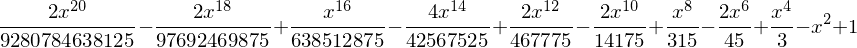

In [4]:
x = Symbol("x")
f = cos(x)**2

# Spuck die Näherung aus
taylor(f,0,20)

Diese Näherung gilt mit minimalem Fehler um den Entwicklungspunkt $x_0$. 

In [5]:
print(taylor(f,0,20))

2*x**20/9280784638125 - 2*x**18/97692469875 + x**16/638512875 - 4*x**14/42567525 + 2*x**12/467775 - 2*x**10/14175 + x**8/315 - 2*x**6/45 + x**4/3 - x**2 + 1


/home/quentin/v/lib/python3.5/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


/home/quentin/v/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/quentin/v/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


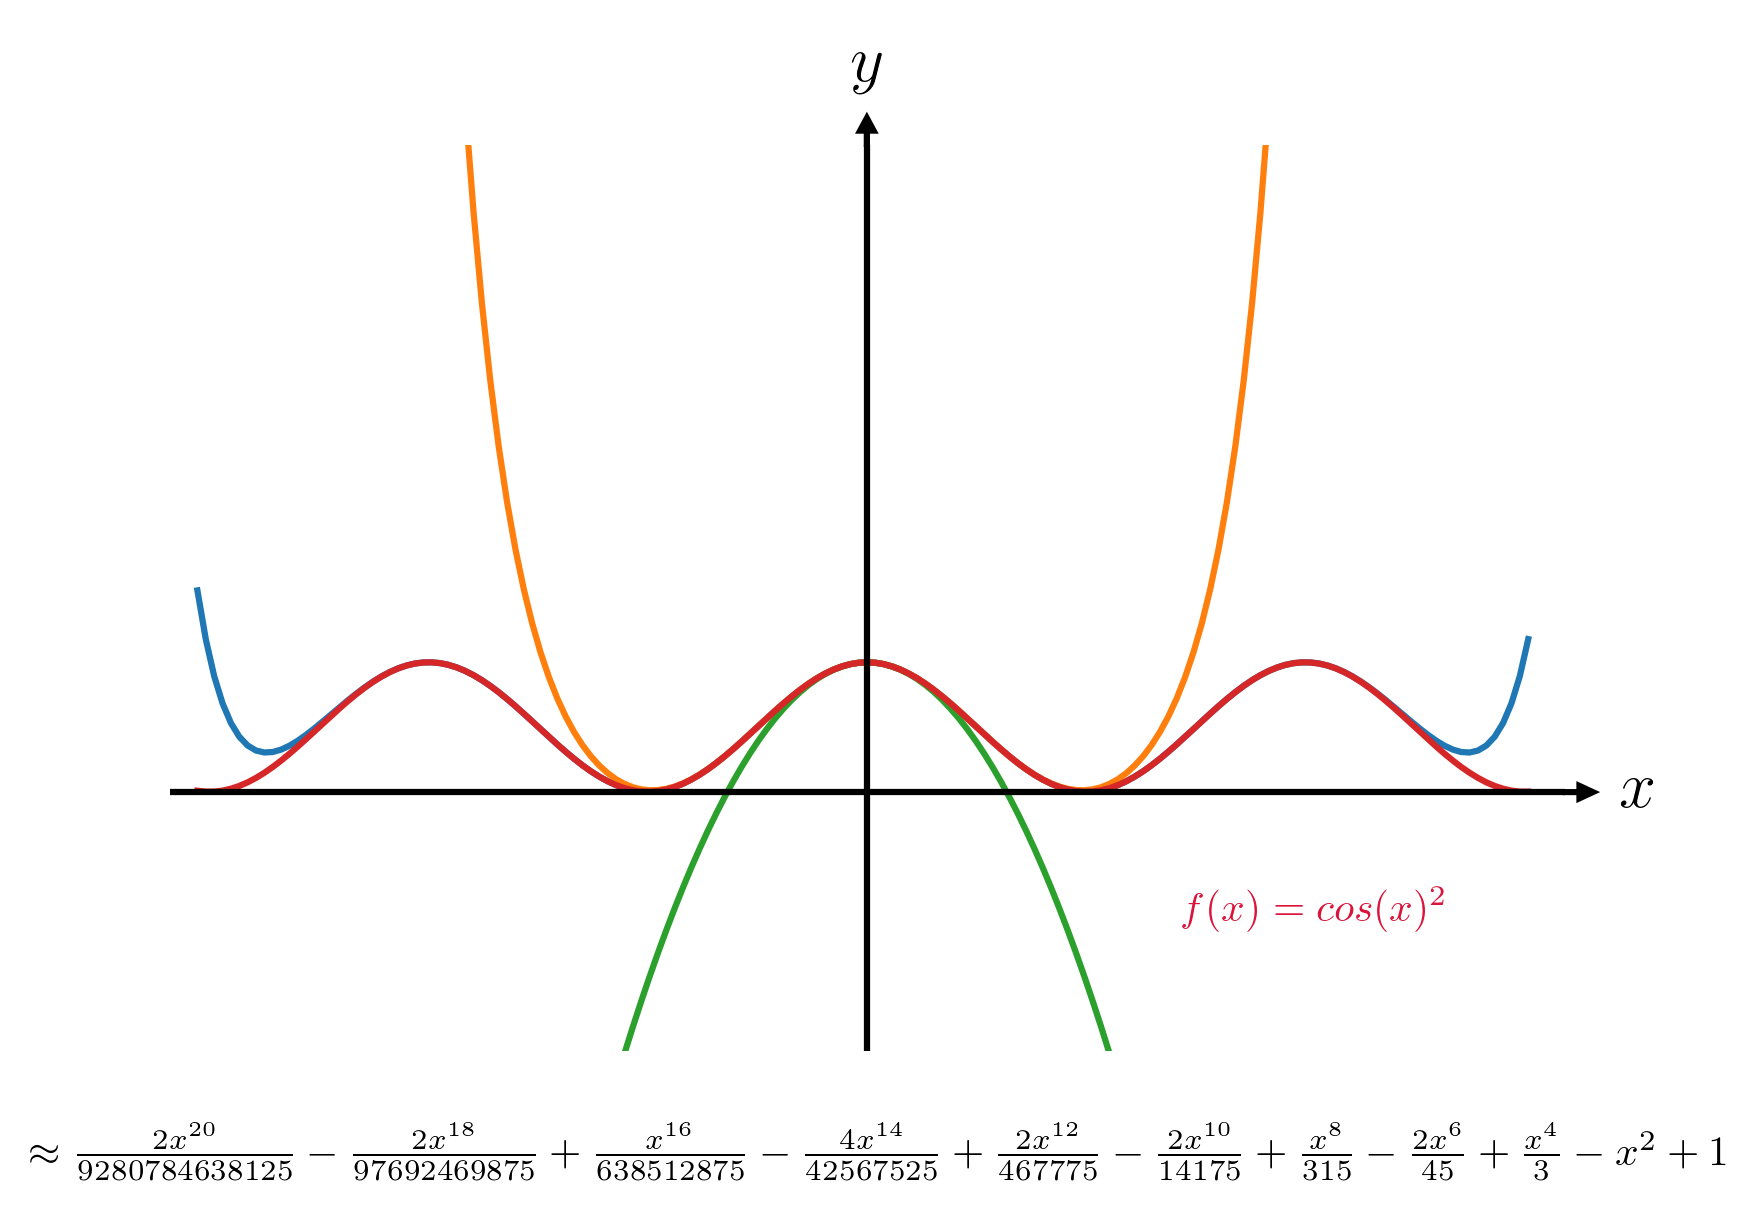

In [6]:
from mpl_toolkits.axes_grid.axislines import SubplotZero
from matplotlib.transforms import BlendedGenericTransform
from matplotlib import patches

# Ändere den LaTeX Font
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

# Erstelle die Figur
fig = plt.figure(1, dpi=300)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)
fig.patch.set_facecolor('white')

y = np.arange(-4.8,4.8,0.06)

# Taylorpolynome
T4 = -y**2 + 1
T10 = y**8/315 - 2*y**6/45 + y**4/3 - y**2 + 1
T20 = 2*y**20/9280784638125 - 2*y**18/97692469875 + y**16/638512875 - 4*y**14/42567525 + 2*y**12/467775 - 2*y**10/14175 + y**8/315 - 2*y**6/45 + y**4/3 - y**2 + 1
ax.plot(y,T20, "-")
ax.plot(y, T10, "-")
ax.plot(y, T4, "-")

# eigentliche Funktion
ax.plot(y, np.cos(y)**2)

# Zeige Formel der besten Näherung unter dem Plot 
plt.text(-6, -3, r"$\approx \frac{2 x^{20}}{9280784638125} - \frac{2 x^{18}}{97692469875} + \frac{x^{16}}{638512875} - \frac{4 x^{14}}{42567525} + \frac{2 x^{12}}{467775} - \frac{2 x^{10}}{14175} + \frac{x^{8}}{315} - \frac{2 x^{6}}{45} + \frac{x^{4}}{3} - x^{2} + 1$")

# f(x) Formel
plt.text(2.26,-1,r"$f(x) = cos(x)^2$", color="crimson")
# Plotachsenstriche
ax.axhline(linewidth=1.5, color="k")
ax.axvline(linewidth=1.5, color="k")
# Zeige Namen der Achsen
ax.text(0, 1.07, r"$y$", transform=BlendedGenericTransform(ax.transData, ax.transAxes), ha='center',size="16")
ax.text(1.04, 0.03, r"$x$", transform=BlendedGenericTransform(ax.transAxes, ax.transData), va='center', size="16")
# Entferne den Rand des Plots
for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)
# x- und y-Achsen Limits
plt.ylim(-2, 5)
plt.xlim(-5, 5)
# Positioniere Pfeile für x- und y-Achse
plt.arrow(5, -0.003, 0.1, 0, width=0.015, color="k", clip_on=False, head_width=0.12, head_length=0.12)
plt.arrow(-0.001, 5, 0, 0.1, width=0.015, color="k", clip_on=False, head_width=0.12, head_length=0.12)


---

Es gilt noch Fragen zu klären, wie:
+ **1. Was ist mit mehrdimensionalen Funktionen?**
+ **2. Was ist mit verketteten Funktionen?**
+ **3. Wie lässt sich zwischen den Polynomen interpolieren?**

---

# Gebrochene Differentiale von Polynomen
Wir greifen tief in den Trickkistensack der komplexen Analysis greifen. Wir können mit Hilfe von gebrochenen Differentialen (fractual differentials) zwischen Taylorpolynomen interpolieren. Dabei ist der Exponent des Differentialoperators nicht mehr eine natrüliche, sondern eine Bruchzahl. Es gilt

$$ \frac{d^n}{dx^n}x^m = \frac{m!}{(m-n)!} \cdot x^{m-n} $$
---

Obwohl es sich hierbei um eine zunächst einfache Formel handelt, so ist $(m-n) \in \mathbb{R}$, wir müssen den Faktor-Operator daher von den natürlichen Zahlen zu den reellen erweitern. Wenn wir schon dabei sind, tun wir dies gleich auch für die komplexe Zahlen.

Für $n \in \mathbb{R}_{>0}$ gilt

$$ n! = \Gamma(n+1) = \int_{0}^{\infty}x^n \cdot e^{-(n+1)}dx$$
---

Na viel Spaß beim lösen...

Zum Glück haben wir einen Computer, der die Lösung auch numerisch nähern kann!


In [112]:
from math import gamma, factorial

def realFactorial(n):
    return gamma(n+1)

def fracDiffFactor(diffExponent,m):
    return (factorial(m))/realFactorial(m-diffExponent)

def fracDiff(Polynome, variable, diffExponent):
    """
    1 > diffExponent > 0
    """
    
    # get the polynom
    pol = list(str(Polynome))
    newPol = str()
    
    for z in range(len(pol)):
        if pol[z] == str(variable):
        
            # muliply terms with fracDiffFactor
            if pol[z-2] == "+":
                pol[z-1] = (str(fracDiffFactor(diffExponent,int(pol[z+3])))) + "*"
            else:
                pol[z-1] = "*" + (str(fracDiffFactor(diffExponent,int(pol[z+3])))) + "*"
        
            # deminish the exponents of the elements of the polynom
            newExp = float(pol[z+3]) - diffExponent
            pol[z+3] = str(newExp)
        
        # delete term without variable
        if z == (len(pol)-1) and pol[z] != "x":
            pol[z] = "0"
        
    # return the differentiated polynom 
    for e in pol:
        newPol += e
    return simplify(newPol)

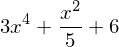

In [113]:
pol = x**2/5 + 3*x**4 + 6
pol

In [121]:
fracDiff(pol, x, 0.5)
# TODO: find complete float term exponent so tat fracDiffs can be computed over and over again!